In [1]:
# use env weather (local)

In [2]:
import xarray as xr
import os
import numpy as np
import sys
import json
from datetime import datetime
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
variable = "10m_u_component_of_wind"
timestp = "20240201-1307"

In [4]:
sfno = xr.open_mfdataset("/mnt/V/Master/climate/skillscores/sfno/20240131-1721/rmse_global*")

In [6]:
sfno_step = sfno.sel(step=[6])['rmse'].squeeze()

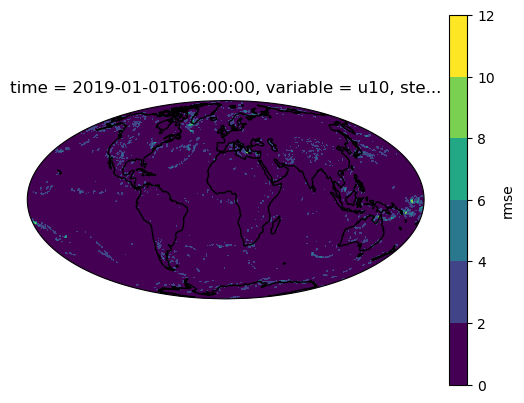

In [7]:
#Mollweide

ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
sfno_step.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

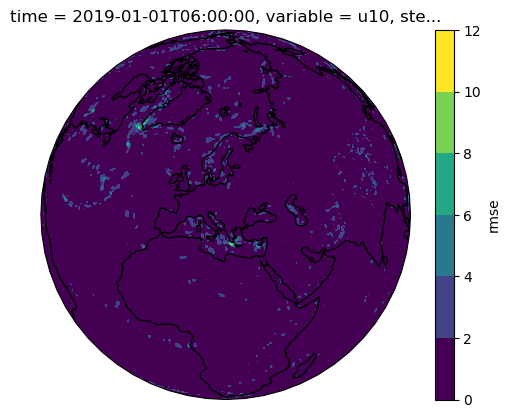

In [13]:
# Orthografic

ax = plt.axes(projection=ccrs.Orthographic(20, 45))
ax.set_global()
sfno_step.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()


In [13]:
np_path   = "/mnt/V/Master/climate/skillscores/"+variable+"/"+timestp+"/"
rmse_sfno = np.load(np_path + "rmse_sfno_"+variable+"_"+timestp+"_fin.npy")
rmse_fcn  = np.load(np_path + "rmse_fcn_"+variable+"_"+timestp+"_fin.npy")
rmse_ref  = np.load(np_path + "rmse_ref_"+variable+"_"+timestp+"_fin.npy")

nans_sfno = np.load(np_path + "nans_sfno_"+variable+"_"+timestp+"_fin.npy")
nans_fcn  = np.load(np_path + "nans_fcn_"+variable+"_"+timestp+"_fin.npy")

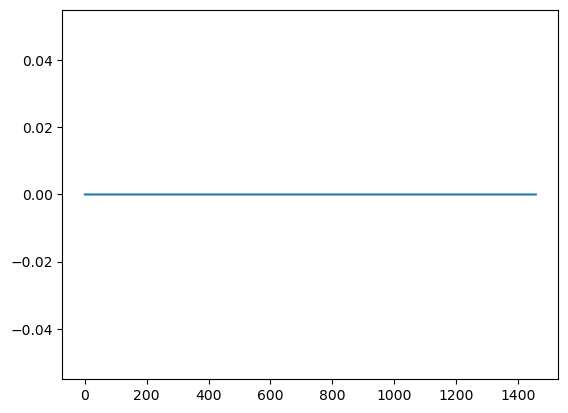

In [8]:
plt.plot(nans_sfno)

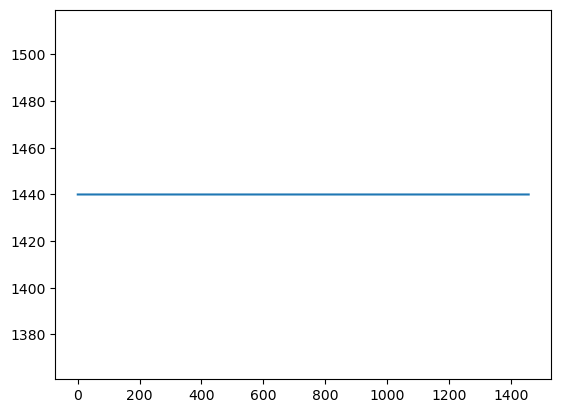

In [9]:
plt.plot(nans_fcn)

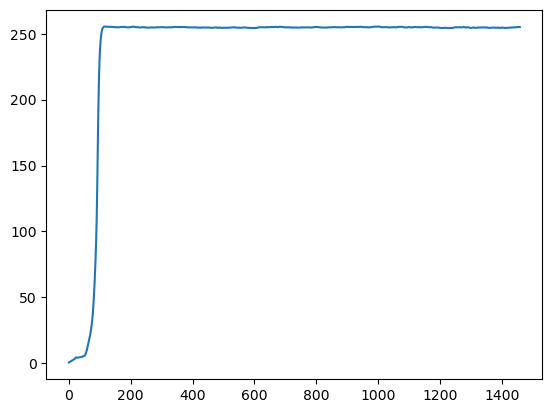

In [14]:
plt.plot(rmse_fcn)

(0.0, 100.0)

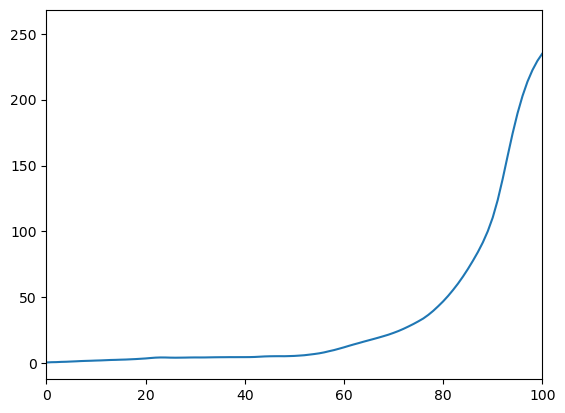

In [19]:
plt.plot(rmse_fcn)
plt.xlim(0,100)

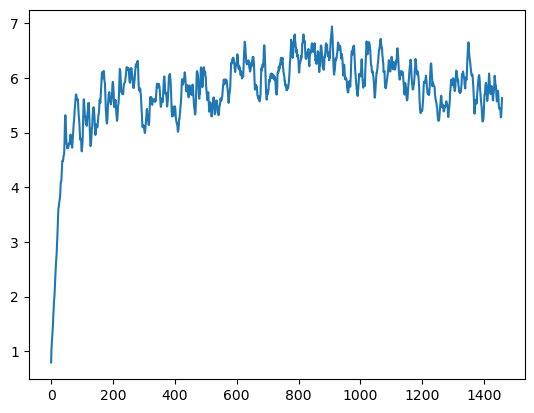

In [15]:
plt.plot(rmse_sfno)

(0.0, 100.0)

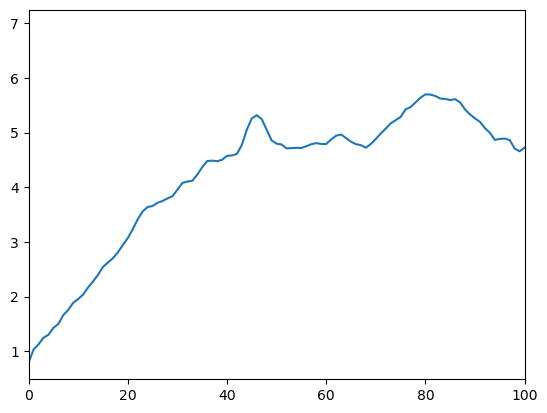

In [20]:
plt.plot(rmse_sfno)
plt.xlim(0,100)

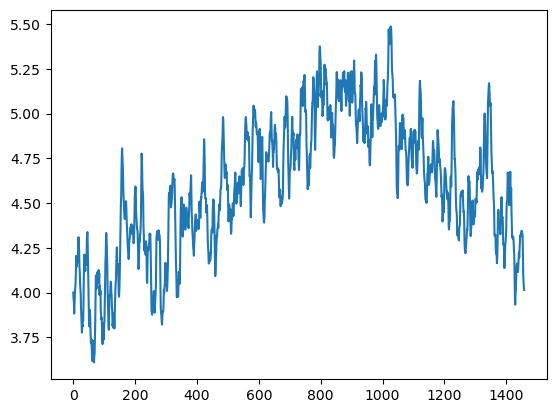

In [16]:
plt.plot(rmse_ref)

In [17]:
skill_fcn  = 1 - rmse_fcn /rmse_ref
skill_sfno = 1 - rmse_sfno/rmse_ref

In [24]:
zero_line = np.zeros(skill_fcn.shape)

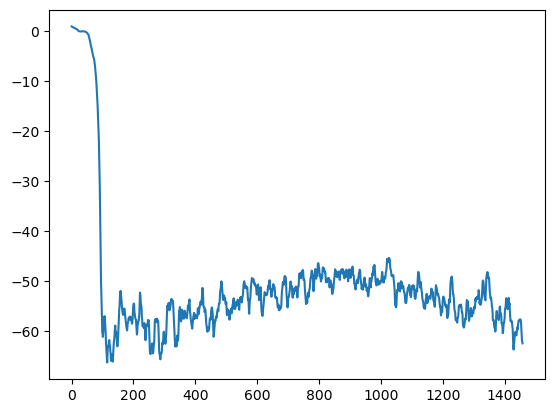

In [21]:
plt.plot(skill_fcn)

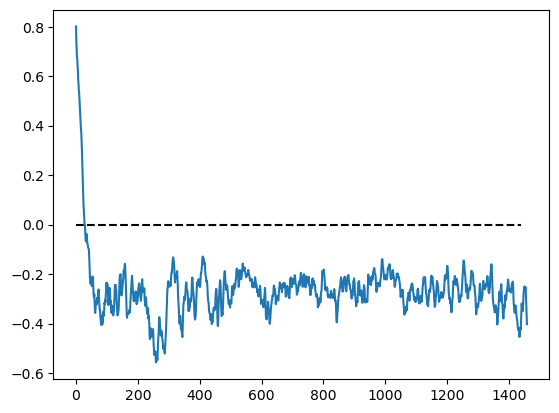

In [30]:
plt.plot(skill_sfno)
# plt.plot(skill_fcn,linestyles='-',color="b")
plt.hlines(y=0,xmin=0,xmax=1440,linestyles='--',color="black")

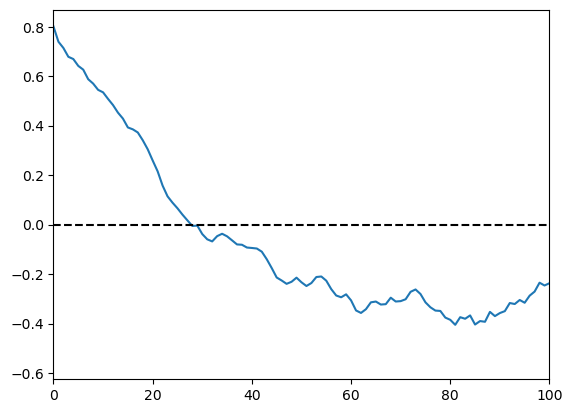

In [31]:
plt.plot(skill_sfno)
plt.xlim(0,100)
plt.hlines(y=0,xmin=0,xmax=1440,linestyles='--',color="black")

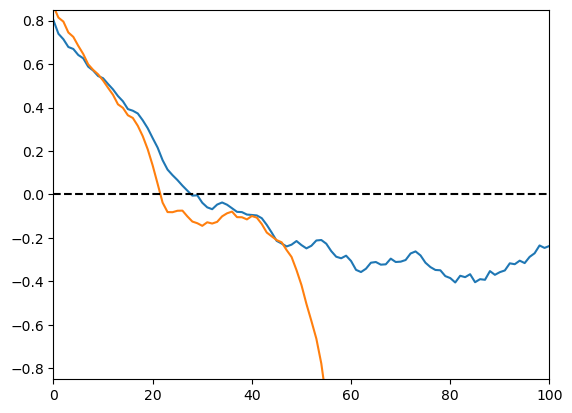

In [34]:
plt.plot(skill_sfno)
plt.plot(skill_fcn)
plt.xlim(0,100)
plt.ylim(-0.85,0.85)
plt.hlines(y=0,xmin=0,xmax=1440,linestyles='--',color="black")